In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [3]:
from keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Checking the length of Training and Test Dataset

In [6]:
print("Number of training samples", x_train.shape[0])
print("Number of training classes", len(y_train))

Number of training samples 60000
Number of training classes 60000


In [7]:
print("Number of testing samples", x_test.shape[0])
print("Number of testing classes", len(y_test))

Number of testing samples 10000
Number of testing classes 10000


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'T-shirt/top')

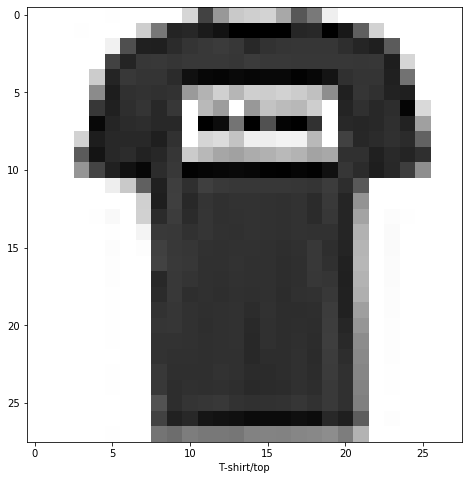

In [10]:
plt.figure(figsize=(10, 8))
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[1]])

## Reshape the dataset into required format

In [11]:
x_train[0].shape[0]

28

In [12]:
x_train[1].shape[0]

28

In [13]:
rows = x_train[0].shape[0]

In [14]:
cols = x_train[1].shape[0]

In [15]:
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)

In [16]:
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

## Changing the data type to float

In [17]:
x_train = x_train.astype('float32')

In [18]:
x_test = x_test.astype('float32')

## Normalize the data so that all the values are in the range 0-1

In [19]:
x_train = x_train/255
x_test = x_test/255

## Convert the classes using OneHot Encoding

In [20]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [21]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Creating the Neural Network Model

In [22]:
model = Sequential()

W0904 17:38:37.542029   712 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [23]:
images_shape = (rows, cols, 1)

In [24]:
model.add(Conv2D(32, kernel_size=(3, 3),
                activation='relu',
                input_shape=images_shape))

W0904 17:38:37.773403   712 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0904 17:38:37.824379   712 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [25]:
model.add(Conv2D(64, (3, 3), activation='relu'))

In [26]:
model.add(MaxPooling2D(pool_size=(2, 2)))

W0904 17:38:37.992324   712 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(128, activation='relu'))

In [29]:
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

W0904 17:38:38.279121   712 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0904 17:38:38.308107   712 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(x_train, y_train, batch_size=200, epochs=5)

W0904 17:38:38.700269   712 deprecation.py:323] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0904 17:38:39.028689   712 deprecation_wrapper.py:119] From c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 155s 3ms/step - loss: 0.5581 - acc: 0.8012
Epoch 2/5
60000/60000 [==============================] - 187s 3ms/step - loss: 0.3251 - acc: 0.8827
Epoch 3/5
60000/60000 [==============================] - 146s 2ms/step - loss: 0.2700 - acc: 0.9005
Epoch 4/5
60000/60000 [==============================] - 138s 2ms/step - loss: 0.2323 - acc: 0.9145
Epoch 5/5
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2034 - acc: 0.9243


### Making Predictions

In [33]:
predictions = model.predict(x_test)

### Single Prediction

In [37]:
np.argmax(predictions[0])

9

In [38]:
class_names[9]

'Ankle boot'

### Plot details prediction details regarding the image

In [46]:
def prediction_original_label_details(x, i):
    predicted_value = np.argmax(x)
    predicted_label = class_names[predicted_value]
    original_value = np.argmax(y_test[i])
    original_label = class_names[original_value]
    print("Predicted Label is:", predicted_label, end=" --- ")
    print("Original Label is:", original_label)

In [47]:
for i in range(0, 5):
    prediction_original_label_details(predictions[i], i)

Predicted Label is: Ankle boot --- Original Label is: Ankle boot
Predicted Label is: Pullover --- Original Label is: Pullover
Predicted Label is: Trouser --- Original Label is: Trouser
Predicted Label is: Trouser --- Original Label is: Trouser
Predicted Label is: Shirt --- Original Label is: Shirt


### Plot the image and Histogram

In [84]:
def plot_image():
    plt.imshow(x_test[..., 0][0], cmap=plt.cm.binary)
    original_value = np.argmax(y_test[0])
    original_label = class_names[original_value]
    plt.xlabel("Original label - " + original_label)

In [83]:
def plot_bar():
    plt.bar(range(10), y_train[0])
    plt.xticks(range(10), class_names, rotation=30)

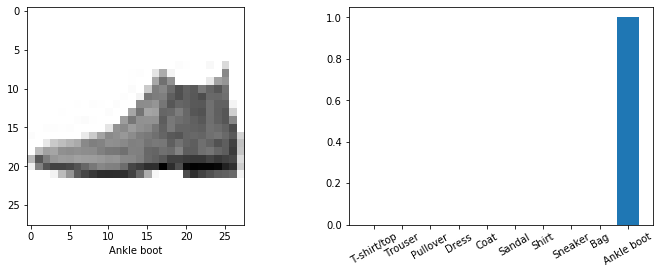

In [91]:
## plot image
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
plot_image()

## plot bar graph
ax2 = fig.add_subplot(1, 2, 2)
plot_bar()